# Comparing variable and fixed interest rates

Comparing variable and fixed interest rate mortgages is hard.  While there are some obvious points of comparison (typically lower rates for variable at any given point, and higher rates for fixed; early termination fees are smaller for variable than fixed, etc.) it's difficult to get any accurate comparisons of where your money is going and what is a better investment.

The metric I care about is for a fixed monthly payment, how much is going into principal and how much is going into interest? This is suprisingly difficult to answer online-- I didn't find any good calculators for this, because no one want to provide a tool for specifying future interest rates. Things get even more complicated to make comparisons with, because fixed and variable rate mortgages compound interest differently (semi-annually vs monthly). So what we should do is make a comparison list of several possible interest rate trajectories, and see what the outcomes are.

A few observations about what we want to learn: 

* Variable rates tend to be lower, and therefore start with a lower monthly payment. We're going to raise our montly payment here with extra pyaments towards principal to equalize the payments. 
* When interest rates go up for variable rate loans, the monthly payment stays the same, and less money goes towards principal. This is where the interesting comparison lies: we'll typically be paying the same amount no matter what, but want to see how much of this is going towards our equity (principal) vs the bank.
* At least one of our lending options for the variable requires a 30 year term, which again lowers the monthly payment. We'll make up for the difference using extra payments towards principal, and see how this ends up comparing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# basic imports
import calc_tools as ct
import numpy as np

## Some basic comparisons

We are going for a 985000 condo, with a 350000 downpayment, leading to a 635000 mortgage. Our best fixed rate offer is a 25 year, 3.09% rate. The basic payments are going to be:

In [3]:
monthly_fixed = ct.calculate_payment(635000, 3.09, 25)
print(monthly_fixed)

3034.51


The calculations are all done via the calc_tools.py python module that lives in the same area as this notebook.

Let's compare the payment to the variable offer we have, hypothetically for a 25 year:

In [4]:
monthly_variable = ct.calculate_payment(635000, 1.79, 25, variable = True)
print(monthly_variable)

2627.03


Extra payments per month should be the difference here:

In [5]:
extra_25 = ct.generate_flat(monthly_fixed - monthly_variable)
print(extra_25[0])

407.48


Let's calculate a few scenarios out now:

1) Fixed rate 
2) Variable rate, no extra payments
3) Variable rate, with extra payments

For both variable rate scenarios right now, we're going to assume no rate increases. Super optimistic, but let's see what happens in order to build some intuition.

In [6]:
variable_base = ct.generate_flat(1.79)
fixed = ct.generate_flat(3.09)

The function that does the magic here is ```calculate_montly_amortization(loan, rates, loan_length_years, term_length_years, extra_payments = [], variable = False)```. 

In [7]:
output_fixed = ct.calculate_monthly_amortization(635000, fixed, 25, 5, variable = False)
output_variable_base = ct.calculate_monthly_amortization(635000, variable_base, 25, 5, variable = True)
output_variable_base_extra = ct.calculate_monthly_amortization(635000, variable_base, 25, 5, extra_payments = extra_25, variable = True)

Magic! The hard part is done. Let's do some comparisons now.

In [8]:
basic_comparison = [output_fixed, output_variable_base, output_variable_base_extra]
basic_labels = ['Fixed 3.09', 'Variable 1.79', 'Variable 1.79 w/ extra']

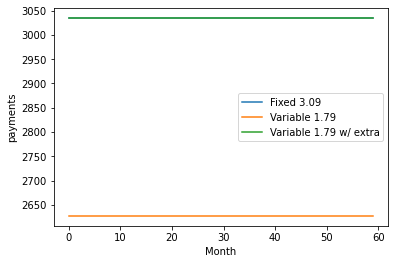

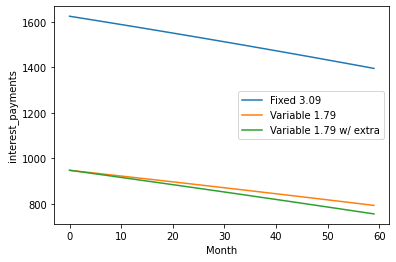

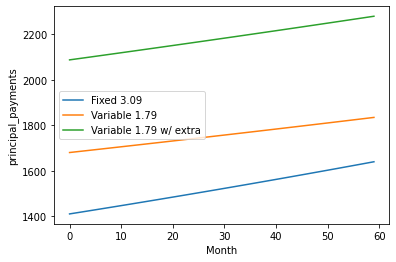

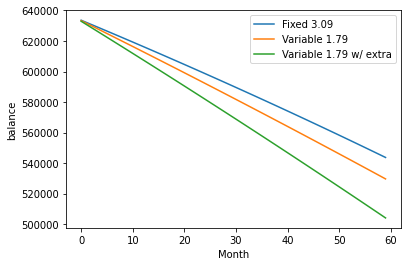

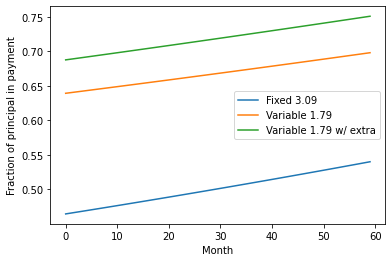

In [9]:
ct.make_plots(basic_comparison, basic_labels)

A few observations:

* Payments are fixed, as they should be. And the VR + extra matches the fixed.
* The fraction of the payment that is interest shrinks over time, and the fraction that is interest grows, as expected.
* There is quite a difference in terms of the balances at the end! As expected with a much lower interest rate.
* Finally, you can also see the fraction of principal being paid in the payment; with the higher interest rate, much, much smaller fractions are being paid toward the principal.

Let's summarize some of the takehome points:

In [15]:
ct.make_summary(basic_comparison, basic_labels)

For Fixed 3.09, your final balance is 543698.97. You paid 90769.57 in interest and 91301.03 in principal, for a principal fraction of 0.501.

For Variable 1.79, your final balance is 529644.89. You paid 52266.69 in interest and 105355.11 in principal, for a principal fraction of 0.668.

For Variable 1.79 w/ extra, your final balance is 504088.52. You paid 51159.12 in interest and 130911.48 in principal, for a principal fraction of 0.719.

Out of the above choices, Variable 1.79 w/ extra has the best final balance, at 504088.52. This gives 39610.45 of savings compared to the worst scenario, Fixed 3.09.


Ok-- we've learned a lot! The best scenario here-- the artifically optimistic VR with 1.79 rate compared to the fixed 3.09 saves us nearly 40k over the 5 year mortgage. Nothing to sneeze at! Let's try some more realistic comparisons now.

## More complicated scenarios